# 실습 6차시

제출 기한: 2020년 11월 16일 15시 30분

실습 내용

*   True vs. False and Positive vs. Negative
*   Accuracy
*   Precision and Recall
*   ROC-AUC





# **1. Accuracy**

분류 모델을 만든 후 다음 단계는 모델의 예측 능력을 평가해야합니다. 

예를 들어, 분류 모델을 사용하여 성적에서 B를 넘을 것인지, 아닌지에 대한 여부를 예측하려 합니다. 

모델의 성능을 평가하는 가장 간단한 방법은 모델의 정확도를 계산하는 것입니다. 정확도는 정확하게 분류된 instance의 총 개수를 찾아 총 instance 개수로 나누어 계산합니다.

즉, 정확도는 다음과 같이 정의할 수 있습니다.

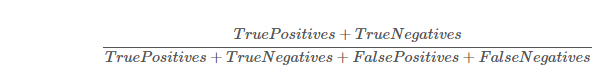

- True Positive(TP): True인데 True라고 맞춘 경우(o, 맞춤)
- False Positive(FP): False인데 True라고 한 경우(x, 틀림)
- True Negative(TN): False인데 False라고 맞춘 경우(o, 맞춤)
- False Negative(FN): True인데 False라고 한 경우(x, 틀림)

In [ ]:
labels_A = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
guesses_A =[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

labels_B = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
guesses_B =[1, 1, 1, 1, 1, 1, 1, 0, 1, 1]

In [ ]:
# TODO: 위의 예제로 TP, FP, TN, FN을 직접 계산해봅니다.
def cal_metrics(labels, guesses):
  true_positive = 0
  true_negative = 0
  false_positive = 0
  false_negative = 0
  for i in range(len(guesses)):
    if labels[i] == 1 and guesses[i] == 1:
      true_positive += 1
    if labels[i] == 0 and guesses[i] == 0:
      true_negative += 1
    if labels[i] == 0 and guesses[i] == 1:
      false_positive += 1
    if labels[i] == 1 and guesses[i] == 0:
      false_negative += 1

  return true_positive, true_negative, false_positive, false_negative

In [ ]:
# TODO: A에 대하여 accuracy를 계산해봅니다.
TP_A, TN_A, FP_A, FN_A = cal_metrics(labels_A, guesses_A)
accuracy_A = (TP_A + TN_A) / len(guesses_A)
print(accuracy_A)

0.8


In [ ]:
# TODO: A에 대하여 accuracy를 계산해봅니다.
TP_B, TN_B, FP_B, FN_B = cal_metrics(labels_B, guesses_B)
accuracy_B = (TP_B + TN_B) / len(guesses_B)
print(accuracy_B)

0.2


# **2. Recall**

정확도는 데이터에 따라 잘못된 metric일 수 있습니다. 내일 1m 이상의 눈이 올지 여부를 예측하려는 모델의 예를 들겠습니다. 이 예시에서 항상 False을 예측하는 분류기는 높은 정확도를 가집니다. 눈이 그렇게 많이 오는 날은 거의 없기 때문입니다. 하지만 이 분류기는 우리가 실제로 알고자 하는 정보를 예측하지 못합니다.

이런 상황에서 사용되는 metric은 recall입니다. Recall은 전체 양성 샘플 (TP + FN) 중에서 얼마나 많은 샘플이 양성 클래스(TP)로 분류되는지를 측정합니다. 직관적으로, Recall은 분류기가 positive sample들을 올바르게 찾는 성능을 평가합니다. Recall은 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용됩니다. 즉, 거짓 음성(FN)을 피하는 것이 중요할 때 입니다.

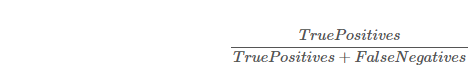

항상 False를 예측하는 알고리즘은 정확도가 매우 높을 수 있지만 True Positive를 찾지 못하므로 Recall은 0입니다. 이는 말이 됩니다. 이러한 불합리한 분류기에 대해서는 Recall이 매우 낮아야 합니다.

In [ ]:
# TODO: Recall_A을 계산해봅니다.
recall_A = TP_A / (TP_A + FN_A)
print(recall_A)

0.3333333333333333


In [ ]:
# TODO: Recall_B을 계산해봅니다.
recall_B = TP_B / (TP_B + FN_B)
print(recall_B)

0.6666666666666666


# **3. Precision**

불행히도, 리콜 역시 완벽한 통계는 아닙니다. 예를 들어, 위의 예제에서 항상 True를 반환하는 분류기를 만들 수 있습니다. 이것은 정확도는 낮지만, 매일 눈 오는 날을 정확하게 찾을 수 있기 때문에 리콜은 1이 될 것입니다. 하지만 이 분류기는 이전 것과 마찬가지로 좋은 분류기가 아닙니다. 이 모델에 결함이 있다는 것을 입증하는 데 도움이 되는 metric는 "Precision"입니다.

Precision은 양성으로 예측된 것 (TP + FP) 중 얼마나 많은 샘플이 진짜 양성 (TP) 인지 측정합니다. 직관적으로 Precision은 negative sample을 positive sample로 예측하지 않는 분류기의 성능을 나타냅니다. Precision은 거짓 양성(FP)의 수를 줄이는 것이 목표일 때 성능 지표로 사용합니다. Precision의 공식은 다음과 같습니다.

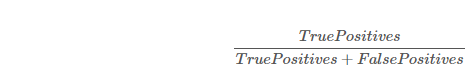

매일 눈이 오는 날을 예측하는 모델은 Recall이 1이지만 Precision는 매우 낮을 것입니다. 눈 오는 날을 정확하게 예측할 것이지만, false positive도 엄청나게 많습니다.

Precision과 Recall은 서로 상충하는 metric입니다. 하나가 내려가면 다른 하나가 올라갑니다.

In [ ]:
# TODO: precision_A을 계산해봅니다.
precision_A = TP_A / (TP_A + FP_A)
print(precision_A)

1.0


In [ ]:
# TODO: precision_B을 계산해봅니다.
precision_B = TP_B / (TP_B + FP_B)
print(precision_B)

0.2222222222222222


# **4. F1 Score**

모델의 Precision과 Recall을 고려하는 것은 유용하지만, 아직 모델이 얼마나 효과적인지 충분히 설명하는 하나의 metric으로 고려되지는 않습니다. 하지만 F1 score을 통해 Precision과 Recall 모두를 고려하는 하나의 metric을 제시할 수 있습니다. F1 score은 Precision과 Recall의 조화평균(harmonic mean)입니다. 조화평균은 n개의 양수에 대하여 그 역수들을 산술평균한 것의 역수를 말합니다.F1 score의 공식은 다음과 같습니다.

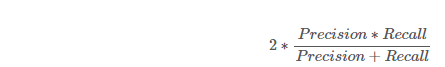

F1 score는 Precision과 Recall을 하나의 metric으로 결합합니다. 산술 평균보다 조화 평균을 사용하여 F1 score을 계산하는 이유는 Precision이나 Recall이 0일 때 F1 score이 낮아지기를 원하기 때문입니다.

예를 들어, Recall = 1이고 Precision = 0.01인 모델이 있다고 가정합니다. Precision이 너무 낮기 때문에 이 모델에 문제가 있을 가능성이 높습니다. 따라서 F1 score은 Precision과 Recall을 같이 고려하므로 불균형한 이진 분류 데이터셋에서는 정확도보다 더 나은 지표가 될 수 있습니다.

산술적 평균(Arithmetic mean)을 이용한 F1 score은 다음과 같습니다.

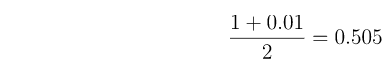

너무 높아 보입니다. 그러나 조화 평균을 사용한 F1 score을 이용하면 다음과 같은 결과를 얻을 수 있습니다.

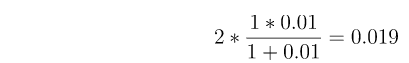

산술 평균을 사용한 F1 score은 현재 이 분류기의 성능를 정확하게 나타내고 있습니다.

In [ ]:
# TODO: F1 score을 계산해봅니다.
f1_A = 2 * (precision_A * recall_A) / (precision_A + recall_A)
print(f1_A)

0.5


In [ ]:
# TODO: F1 score을 계산해봅니다.
f1_B = 2 * (precision_B * recall_B) / (precision_B + recall_B)
print(f1_B)

0.3333333333333333


# **5. Scikit-Learn**

Scikit_learn 라이브러리에는 위의 metric들을 간단하게 계산해주는 함수들이 있습니다.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
guesses = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

In [ ]:
# TODO: 정확도, recall, precision, F1 score을 계산해봅니다.
print(accuracy_score(labels, guesses))
print(recall_score(labels, guesses))
print(precision_score(labels, guesses))
print(f1_score(labels, guesses))

0.3
0.42857142857142855
0.5
0.4615384615384615


# **6. Binary Classification and Model Evaluation**





## 6-1. The Dataset
  
이번 실습은 [California Housing Dataset](https://www.kaggle.com/camnugent/california-housing-prices)를 사용합니다. 이 데이터는 미국의 1990년 인구 조사 데이터를 기반으로 캘리포니아 특정 지역의 주택에 관한 것입니다.

1. longitude: 집이 서쪽으로 얼마나 멀리 떨어져 있는지 나타내는 척도이며, 값이 더 높은 것은 서쪽으로 더 멀리 떨어져 있습니다.
2. latitude: 집이 북쪽으로 얼마나 멀리 떨어져 있는지 나타내는 척도이며, 더 높은 값이 더 북쪽입니다.
3. housing_median_age: 블록 내 주택의 연식입니다. 숫자가 낮으면 새 건물입니다.
4. total_rooms: 블록 내의 방 개수입니다.
5. total_bedrooms: 한 블록 내의 총 침실 개수입니다.
6. population: 한 블록 내의 총 인구 수입니다.
7. households: 한 블록에 대한 총 가구 수입니다.
8. median_income: 주택 블록 내 가구의 중위소득입니다.
9. medium_house_value: 블록 내 가구의 평균 주택 값(미국 달러로 측정)입니다.

In [ ]:
import pandas as pd 

In [ ]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [ ]:
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 6-2. Z-score Normalization

Feature가 여러 개인 데이터로 모델을 훈련시키는 경우 각 피쳐의 값은 거의 동일한 범위를 가져야합니다. 예를 들어 한 feature의 범위가 500 ~ 100,000이고 다른 feature의 범위가 2 ~ 12인 경우 모델을 훈련하기가 어렵거나 불가능합니다.

이번 실습에서 다룰 정규화 방법은 각 raw value(레이블 포함)을 Z-score으로 변환하여 정규화하는 방식입니다. **Z-score**는 특정 raw value에 대한 평균으로부터의 표준 편차의 개수입니다. 예를 들어, 다음과 같은 특성을 가진 feature이 있다고 가정합니다.

  * 평균은 60 입니다.
  * 표준편차는 10 입니다.

75인 raw value는 Z-score이 +1.5이 될 것입니다:

```
  Z-score = (75 - 60) / 10 = +1.5
```

38인 raw value는 Z-score이 -2.2가 될 것입니다:

```
  Z-score = (38 - 60) / 10 = -2.2
```

위에서 다루었듯이 Z-score 정규화 공식은 다음과 같습니다.

$$\frac{value - \mu}{\sigma}$$

여기서 $\mu$는 평균값이고 $\sigma$는 표준 편차입니다. raw value가 feature의 모든 값의 평균과 정확히 같으면 0으로 정규화됩니다. 평균 아래에 있으면 음수가 되고 평균 위에 있으면 양수가 됩니다. Z-score의 크기는 표준 편차에 의해 결정됩니다. 정규화되지 않은 데이터에 큰 표준 편차가 있으면 정규화 값이 0에 가깝습니다.

아래 그래프는 Min-Max Normalization과 Z-score 정규화를 적용한 데이터의 시각화입니다.


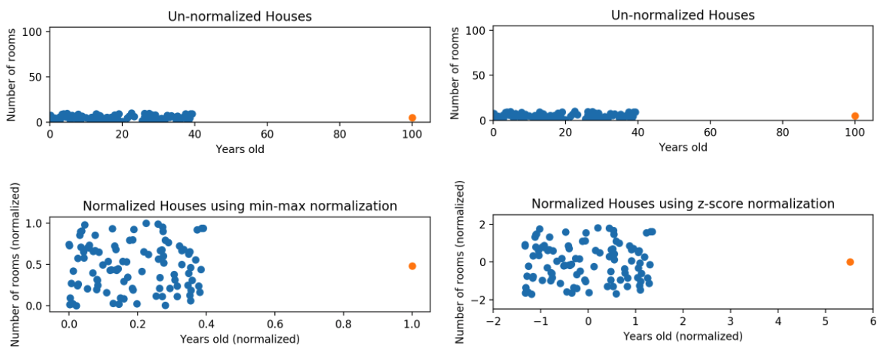

이제 데이터가 두 feature에 대해 거의 동일한 범위 안에 있습니다. 거의 모든 instance들은 x축과 y축에서 -2와 -2 사이에 있습니다. 유일한 잠재적인 단점은 feature이 정확하게 동일한 규모에 있지 않다는 것입니다.

이전 실습에서는 Min-Max Normalization을 통해 두 feature을 0과 1 사이로 변환하였습니다. 이번 실습의 z-score 정규화를 사용하여 변환된 데이터의 x-축 범위는 약 -1.5 ~ 1.5이고 y-축 범위는 약 -2 ~ 2입니다. 정규화하지 않은 데이터와 비교해보았을 때 0 ~ 40의 범위였던 x축이 더 이상 y축을 지배하고 있지 않습니다.

Z-score 정규화와 Min-Max Normalization의 차이점은 다음과 같습니다.

* Min-Max Normalization: 모든 feature의 범위는 동일하지만 outlier는 잘 처리하지 못합니다.
* Z-Score Normalization: outlier을 잘 처리하지만 정확히 동일한 척도로 정규화된 데이터로 변환되지는 않습니다.

In [ ]:
# TODO: training set에 대하여 Z-Score 정규화를 합니다.
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean) / train_df_std

In [ ]:
# TODO: 정규화된 데이터를 확인합니다.
train_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619288,-0.671500,-1.079639,1.361655,1.764152,-0.361173,-0.075996,-1.252506,-1.210522
1,2.539494,-0.573248,-0.761850,2.296540,3.230346,-0.261858,-0.099401,-1.081451,-1.096713
2,2.494610,-0.905436,-0.920744,-0.882436,-0.866931,-0.955326,-0.999223,-1.170071,-1.048430
3,2.489623,-0.928830,-1.159087,-0.524171,-0.480216,-0.796769,-0.715753,-0.362590,-1.154480
4,2.489623,-0.961581,-0.682402,-0.545731,-0.506313,-0.701809,-0.622130,-1.026424,-1.222593


In [ ]:
# TODO: test set에 대해서도 동일하게 Z-Score 정규화를 합니다.
test_df_mean = test_df.mean()
test_df_std = test_df.std()
test_df_norm = (test_df - test_df_mean) / test_df_std

## 6-3. Create a binary label

분류 문제에서 모든 예제의 레이블은 0 또는 1이어야 합니다. 하지만 California Housing Dataset의 label인 `median_house_value`는 0과 1이 아닌 80,100 또는 85,700과 같은 float 값을 포함하고 있는 반면, 정규화된 데이터의 median_house_values는 주로 -3과 +3 사이의 float 값을 포함하고 있습니다.

Training set과 test set에 `median_house_value_is_high`의 새 column을 만듭니다. `median_house_value`가 특정 임계값(`threshold`)보다 높은 경우 `median_house_value_is_high`를 1로 설정합니다. 그렇지 않으면 `median_house_value_is_high`를 0으로 설정합니다.

In [ ]:
# TODO: median_house_value를 임계값에 따라 0과 1로 인코딩합니다.
threshold_in_z = 1.0
train_df_norm['median_house_value_is_high'] = (train_df_norm['median_house_value'] > threshold_in_z).astype(float)    # astype 전까지 return값이 true나 false인데 그 값을 astype을 통해 float형으로 변환하는거
test_df_norm['median_house_value_is_high'] = (test_df_norm['median_house_value'] > threshold_in_z).astype(float)    # column 생성된거야~

In [ ]:
# TODO: 변환이 잘 되었는지 확인해봅니다.
train_df_norm['median_house_value_is_high'].head(8000)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7995    0.0
7996    1.0
7997    1.0
7998    1.0
7999    1.0
Name: median_house_value_is_high, Length: 8000, dtype: float64

In [ ]:
# TODO: 데이터셋의 column들을 프린트해봅니다.
train_df_norm.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'median_house_value_is_high'],
      dtype='object')

In [ ]:
# TODO: California housing dataset은 label이 불균형한 데이터입니다. 불균형한 정도를 확인해봅니다.
print(train_df_norm['median_house_value_is_high'].value_counts())
print(train_df_norm['median_house_value_is_high'].value_counts() / train_df_norm.shape[0])    # 비율을 알기 위해 전체 데이터 셋 갯수로 나눈거

0.0    14223
1.0     2777
Name: median_house_value_is_high, dtype: int64
0.0    0.836647
1.0    0.163353
Name: median_house_value_is_high, dtype: float64


In [ ]:
# TODO: train/test의 X와 y를 분리합니다.
x_train = train_df_norm.drop(columns=['median_house_value', 'median_house_value_is_high'])
x_test = test_df_norm.drop(columns=['median_house_value', 'median_house_value_is_high'])

y_train = train_df_norm['median_house_value_is_high']
y_test = test_df_norm['median_house_value_is_high']

## 6-4. Train a classifier

In [ ]:
# TODO: MLPClassifier을 생성하고 훈련시킵니다.
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=42, max_iter=1000, learning_rate_init=0.01)
clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# TODO: 모델 평가를 위해서 예측값과 예측된 확률값을 만듭니다.
y_pred = clf.predict(x_test)      # clf.predict(x_test): x_test에 대한 예측 값
y_prob = clf.predict_proba(x_test)[:, 1]  # clf.predict_proba(x_test): x_test에 대한 예측 확률값    # positive column에만 관심이 있어서
y_prob[:10]   # positive일 확률

array([9.82404974e-01, 2.98570280e-02, 1.28038433e-01, 8.36820676e-01,
       5.01304492e-04, 4.41176707e-05, 5.58867549e-05, 1.17181582e-02,
       3.26754469e-02, 1.27698942e-04])

In [ ]:
y_pred[:10]

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

# 6-5. Evaluate the model

### Confusion Matrix

In [ ]:
# TODO: confusion matrix를 출력해봅니다.
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[2416,  110],
       [ 149,  325]])

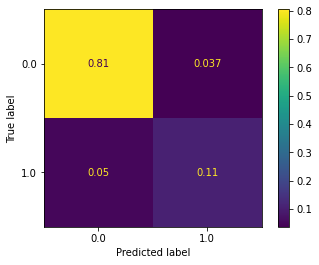

In [ ]:
# TODO: confusion matrix를 시각화해봅니다.
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x_test, y_test, normalize='all')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

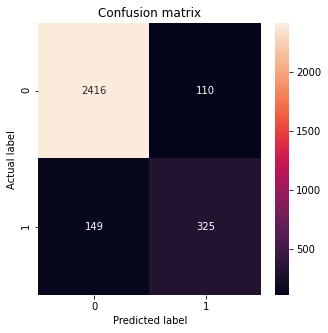

In [ ]:
# TODO: plot_cm 함수를 이용하여 시각화 해봅니다.
plot_cm(y_test, y_pred)

### Precision-Recall

모델의 분류 작업을 결정하는 임계값을 바꾸는 것은 해당 분류기의 precision과 recall의 상충 관계를 조정하는 일 입니다. 예를 들어 양성 샘플의 실수(FN)을 10%보다 작게 하여 90% 이상의 recall을 원할 수 있습니다. 이런 결정은 데이터와 애플리케이션에 따라 다르며 목표에 따라 달리 결정됩니다. 어떤 목표가 선택되면 (즉, 어떤 클래스에 대한 특정 recall 또는 precision의 값) 적적한 임계값을 지정할 수 있습니다. 다시 말해 90% recall과 같은 특정 목적을 충족하는 임계값을 설정하는 것은 언제든 가능합니다. 어려운 부분은 이 임계값을 유지하면서 적절한 precision을 내는 모델을 만드는 일 입니다. 만약 모든 것을 양성이라고 분류하면 recall이 100이 되지만 이러한 모델은 쓸모가 없을 것 입니다.

새로운 모델을 만들 때에는 임계값이 명확하지 않은 경우가 많습니다. 이런 경우에는 문제를 더 잘 이해하기 위해 모든 임계값을 조사해보거나, 한번에 precision과 recall의 모든 장단점을 살펴보는 것이 좋습니다. 이를 위해 precision-recall curve를 사용합니다.

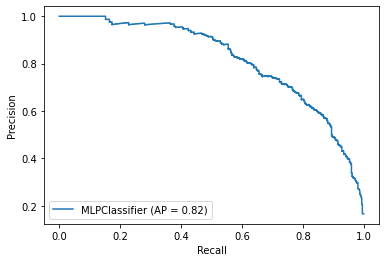

In [ ]:
# TODO: precision_recall curve를 시각화해봅니다.
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(clf, x_test, y_test)

곡선의 각 포인트는 가능한 임계값에 대하여 precision과 recall입니다. 곡선이 오른쪽 위로 갈 수록 더 좋은 분류기입니다. 오른쪽 위 지점은 한 임계값에서 precision과 recall이 모두 높은 곳 입니다. 곡선은 임계값이 매우 높아 전부 양성 클래스가 되는 왼쪽 위에서 시작합니다. 임계값이 작아지면서 곡선은 recall이 높아지는 쪽으로 이동하게 되지만 precision은 낮아집니다. precision이 높아져도 recall이 높게 유지될수록 더 좋은 모델입니다.

### ROC and AUC

ROC Curve는 여러 임계값에서 분류기의 특성을 분석하는데 널리 사용하는 도구입니다. Precision-Recall curve와 비슷하게 ROC curve는 분류기의 모든 임계값을 고려하지만, 정밀도와 재현률 대신 True Positive Rate(TPR)에 대한 False Positive Rate(FPR)을 나타냅니다. True Positive Rate은 Recall의 다른 이름이여, False Positive Rate은 전체 음성 샘플 중에서 거짓 양성으로 잘못 분류한 비율입니다. ROC curve는 roc_curve 함수를 사용하여 만들 수 있습니다. ROC curve는 왼쪽 위에 가까울 수록 이상적입니다. False Positive Rate이 낮게 유지되면서 recall이 높은 분류기가 좋은 것 입니다.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([0,100])
  plt.ylim([0,100])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

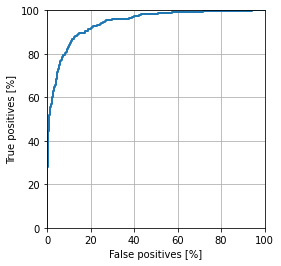

In [ ]:
# TODO: roc curve를 시각화해봅니다.
plot_roc('ROC Curve', y_test, y_prob)

곡선 아래의 면적값 하나로 ROC curve를 요약할 수 있습니다. 이 면적을 보통 AUC(Area Under the Curve)라고 합니다. 이 ROC curve 아래 면적은 roc_auc_score 함수로 계산합니다.

In [ ]:
# TODO: roc_auc_score 출력하기
from sklearn.metrics import roc_auc_score

au

0.9421551727017916

In [ ]:
clf.score(x_test, y_test)

0.9136666666666666

scikit-learn의 classification_report는 accuracy, precision, recall, f1 score의 점수 모두를 한번에 계산해서 깔끔하게 출력해줍니다.

In [ ]:
# TODO: classification report 출력하기
from sklearn.metrics import classification_report

print(y_test)
print(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      2526
         1.0       0.75      0.69      0.72       474

    accuracy                           0.91      3000
   macro avg       0.84      0.82      0.83      3000
weighted avg       0.91      0.91      0.91      3000



#  **과제**

### Credit Card Fraud data set

Credit Card Fraud data set는 2013년 9월 유럽 사용자의 이틀 동안의 신용카드 결제내역입니다.
284,807개의 트랜잭션 중 492개의 이상 거래가 있습니다. 데이터의 불균형이 매우 심하며, positive class(이상 거래)가 모든 트랜잭션의 0.172%를 차지합니다.

데이터에는 PCA 변환의 결과인 숫자 입력 변수만 포함되며, 기밀성 문제로 인해 데이터의 원래 기능과 더 많은 배경 정보가 제공되지 않습니다. 특징 V1, V2 및 … V28은 PCA를 통해 얻은 주요 feature이며, PCA를 통해 변환되지 않은 feature들은 'time'과 'amount'입니다. 'time' feature에는 각 트랜잭션과 데이터 집합의 첫 번째 트랜잭션 사이에 경과된 초입니다. 'amount' 기능은 트랜잭션 금액입니다. 'Class' feature은 label이며 이상 거래 발생 시 1이며 그렇지 않으면 0입니다.

In [ ]:
import numpy as np

raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

In [ ]:
# TODO: 데이터의 column을 프린트해봅니다.

raw_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# TODO: 데이터 label의 distribution을 확인해봅니다.
raw_df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
cleaned_df = raw_df.copy()    # 원본 보존 위해 copy
# time column을 삭제합니다. --- 별로 의미 없어서
cleaned_df.pop('Time')    # pop은 pop이 돼서 반환 함

# amount feature은 범위가 매우 넓습니다. log-space로 변환합니다.
eps=0.001
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

In [ ]:
# 데이터를 train /test로 나눕니다.
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(cleaned_df, test_size=0.3, random_state=42)

In [ ]:
# train/test데이터를 X, y로 나누고 numpy array로 변환합니다.
y_train = np.array(train_df.pop('Class'))
y_test = np.array(test_df.pop('Class'))

X_train = np.array(train_df)
X_test = np.array(test_df)

In [ ]:
X_train   # 데이터가 들쭉날쭉

array([[-2.28956540e+00, -4.80259812e-01,  8.18685114e-01, ...,
         3.92241265e-01, -1.47756654e-01,  9.99500333e-04],
       [-3.13716788e-01, -4.06434174e+00, -3.39844461e+00, ...,
        -2.90331333e-01,  1.10360002e-01,  7.08529961e+00],
       [-1.80976314e+00, -5.67439077e-01,  2.26518571e+00, ...,
        -6.23851804e-02,  8.80786484e-02,  4.31750145e+00],
       ...,
       [-1.46608925e-01,  9.92946123e-01,  1.52459137e+00, ...,
        -1.21139194e-01, -1.96195328e-01,  1.37143450e+00],
       [-2.94863809e+00,  2.35484929e+00, -2.52120111e+00, ...,
         4.96912107e-01,  3.35821632e-01,  9.99500333e-04],
       [ 1.23317435e+00, -7.84850501e-01,  3.86783869e-01, ...,
         1.21657270e-03,  3.85878912e-02,  4.72739667e+00]])

In [ ]:
# scikit-learn의 StandardScaler를 사용하여 데이터를 표준화합니다.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # train에만 fit_transform
X_test = scaler.transform(X_test)     # fit을 안 함. train데이터에 대한 mean값을 가지고 동일하게 적용해야하기 때문에

X_train     # 크기 일정해짐

array([[-1.16681856, -0.28654908,  0.53924737, ...,  0.96676   ,
        -0.4486209 , -1.45524022],
       [-0.15922175, -2.43543667, -2.24540993, ..., -0.71311931,
         0.33519183,  2.04831305],
       [-0.92214029, -0.33881865,  1.4944014 , ..., -0.15212107,
         0.26753092,  0.67949353],
       ...,
       [-0.07400401,  0.59673261,  1.00537176, ..., -0.29672056,
        -0.59571272, -0.77748914],
       [-1.50291696,  1.41328113, -1.66614804, ...,  1.2243654 ,
         1.01984233, -1.45524022],
       [ 0.62962541, -0.46917078,  0.25405412, ...,  0.0044092 ,
         0.11724428,  0.88220794]])

In [ ]:
X_train = np.clip(X_train, -5, 5)   # outlier 제거, 만약 x_train 데이터 중, -5보다 작은게 있으면 -5로, 5보다 큰게 있으면 5로  바꿔치기
X_test = np.clip(X_test, -5, 5)

### **과제 내용:**

1. 현재까지 실습에서 다룬 classifier (CategoricalNB, DecisionTreeClassifier, LogisticRegression, MLPClassifier, KNeighborsClassifier) 중 하나를 선택하여 위의 train 데이터에 훈련을 시킵니다. 모델에 따라 모델 파라미터는 자유롭게 설정이 가능합니다. (random_state=42로 고정)

2. test set에 대하여 confusion matrix를 출력하고, 이를 시각화합니다.

3. Precision-Recall curve를 시각화합니다.

4. ROC curve 또한 시각화합니다.

5. AUC를 출력합니다.

6. 마지막으로, classification report를 출력합니다.

7. 위의 결과를 바탕으로 모델이 불균형한 데이터의 관점으로 성능을 평가합니다. 정확도, precision, recall, f1 score, auc에 대한 분석과 더불어 precision-recall curve, roc curve에 대하여도 서술하여야 합니다.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)     # 1. 로지스틱 리그레션 train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(X_test, y_test)   # 모델의 점수 출력

0.9994616293903538

In [ ]:
y_predict = model.predict(X_test)    
y_proba = model.predict_proba(X_test)[:, 1]  

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)     # 2. confusion matrix 생성

array([[85294,    13],
       [   33,   103]])

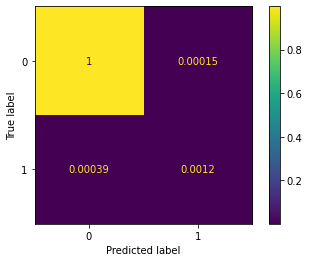

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, normalize='all')   # 2. confusion matrix 시각화

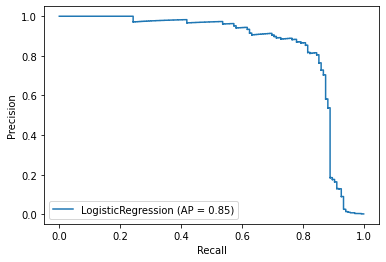

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(model, X_test, y_test)    # 3. Precision-Recall curve를 시각화

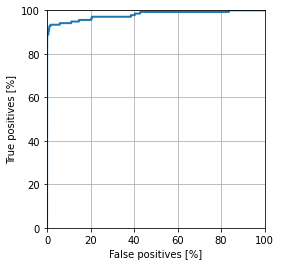

In [ ]:
from sklearn.metrics import roc_curve
plot_roc('ROC Curve', y_test, y_proba)    # 4. ROC curve 또한 시각화

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba)    # 5. AUC

0.9790897098989877

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))   # 6. classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.89      0.76      0.82       136

    accuracy                           1.00     85443
   macro avg       0.94      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(accuracy)
print(precision)
print(recall)
print(f1)

0.9994616293903538
0.8879310344827587
0.7573529411764706
0.8174603174603174


In [ ]:
'''
7.
score: 0.9994616293903538
accuracy: 0.9994616293903538
precision: 0.9994616293903538
recall: 0.7573529411764706
f1 score: 0.8174603174603174
auc: 0.98020049040869

model.score(X_test, y_test)의 값과 accuracy_score(y_test, y_predict)의 값이 같은걸 보면
score는 결국 정확도를 의미하는 것을 알 수 있다.

항상 class 1으로 분류하는 모델을 만들 수 있다. 그렇다면 recall은 1이 될 것이지만, precision은 낮은 값을 갖게 될것이다.
반대로 항상 class 0으로 분류하는 모델을 만들 수 있는데, 이 때는 precision이 1이 되고 recall을 낮은 값을 가질 것이다.
이처럼 recall과 precision은 서로 상충하는 지표이다.

하지만, f1 score는 precision과 recall의 조화평균으로 f1 score 값이 크기 위해서는 precision과 recall 모두 큰 값을 가져야 한다.
즉 두 개의 값을 모두 고려하기 때문에 이처럼 편향된 데이터에서는 더 좋은 지표가 될 수 있다.

주어진 데이터에서 f1 score는 약 0.817 정도로 작지 않고, 실제로 precision과 recall 모두 작지 않은 값임을 알 수 있다.
작지 않은 값이기는 하나 recall이 accuracy나 precision에 비해 작은 값을 갖고 있음을 알 수 있다.
이 데이터는 Negative 데이터가 Positive 데이터보다 훨씬 많은 편향된 데이터다. Positive 데이터 자체가 적기 때문에, recall 값이 유독 작게 나오는 것으로 보인다.

그리고 classification_report 결과를 보면 모든 지표가 class 0에서 더 좋은 점수를 갖고 있다.
class 0에서는 모든 지표가 1의 값(가장 높은 값)을 갖고 있으며 즉, class 0인 데이터를 모두 class 0으로 제대로 분류한다는 의미이다.
반면에 class 1은 precision은 0.89, recall은 0.76이다.
즉, class 1 데이터 중 76퍼센트의 데이터만 class 1이라고 제대로 판별하고, class 1이라고 판별한 데이터 중에는 0.89만이 진짜 class 1 데이터라는 의미이다.
이는 아마 class 0의 데이터가 class 1의 데이터보다 훨씬 많기 때문에, 높은 정확도를 위해 class 0의 데이터를 제대로 판단하는 것에
더 집중했기 때문이다.

precision-recall curve와 roc curve는 threshold에 따라서 각각 지표의 값이 어떻게 되는지를 보여준다.
또한 두 그래프는, 각각 x축이 precision과 1-precision이다.
precision-recall curve는 precision이 높아져도 recall이 높게 유지될수록 더 좋은 모델이다. 즉 최대한 우측 상단에 가까울 수록 좋은 그래프이고,
roc curve는 좌측 상단에 가까울수록 좋은 그래프이다. 두 그래프 모두 아래 면적이 클 수록 좋다.

만든 모델의 두 그래프는 각각 우측 상단, 좌측 상단에 굉장히 가까운 모습으로 굉장히 좋은 성능을 보인다.

즉, 이 그래프는 모델의 성능을 간략하게 보여준다고 볼 수 있다. 이 그래프 아래의 면적이 1에 가까울수록 성능이 좋은데
이 모델의 AUC는 약 0.982정도로 굉장히 높은 성능을 보이는 것을 알 수 있다.
'''

'\n7.\nscore: 0.9994616293903538\naccuracy: 0.9994616293903538\nprecision: 0.9994616293903538\nrecall: 0.7573529411764706\nf1 score: 0.8174603174603174\nauc: 0.98020049040869\n\nmodel.score(X_test, y_test)의 값과 accuracy_score(y_test, y_predict)의 값이 같은걸 보면\nscore는 결국 정확도를 의미하는 것을 알 수 있다.\n\n항상 class 1으로 분류하는 모델을 만들 수 있다. 그렇다면 recall은 1이 될 것이지만, precision은 낮은 값을 갖게 될것이다.\n반대로 항상 class 0으로 분류하는 모델을 만들 수 있는데, 이 때는 precision이 1이 되고 recall을 낮은 값을 가질 것이다.\n이처럼 recall과 precision은 서로 상충하는 지표이다.\n\n하지만, f1 score는 precision과 recall의 조화평균으로 f1 score 값이 크기 위해서는 precision과 recall 모두 큰 값을 가져야 한다.\n즉 두 개의 값을 모두 고려하기 때문에 이처럼 편향된 데이터에서는 더 좋은 지표가 될 수 있다.\n\n주어진 데이터에서 f1 score는 약 0.817 정도로 작지 않고, 실제로 precision과 recall 모두 작지 않은 값임을 알 수 있다.\n작지 않은 값이기는 하나 recall이 accuracy나 precision에 비해 작은 값을 갖고 있음을 알 수 있다.\n이 데이터는 Negative 데이터가 Positive 데이터보다 훨씬 많은 편향된 데이터다. Positive 데이터 자체가 적기 때문에, recall 값이 유독 작게 나오는 것으로 보인다.\n\n그리고 classification_report 결과를 보면 모든 지표가 class 0에서 더 좋은 점수를 갖고 있다.\nclass 0에서는 모든 지표가 1의 값(가장 높